In [2]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service as EdgeService
from selenium.webdriver.edge.options import Options as EdgeOptions
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# Setup Edge WebDriver
options = EdgeOptions()
options.add_argument("--start-maximized")
service = EdgeService(EdgeChromiumDriverManager().install())
driver = webdriver.Edge(service=service, options=options)

# Categories to scrape
categories = {
    "laptops": "laptop",
    "mobiles": "mobile"
}

all_data = []

# Loop through categories
for category_name, keyword in categories.items():
    print(f"\nScraping Category: {category_name.upper()}")
    category_data = []
    page = 1

    while len(category_data) < 500:
        print(f"Page {page}")
        url = f"https://www.amazon.in/s?k={keyword}&page={page}"
        driver.get(url)
        time.sleep(3)

        soup = BeautifulSoup(driver.page_source, "html.parser")
        results = soup.find_all("div", {"data-component-type": "s-search-result"})

        for item in results:
            # Title
            title_tag = item.h2
            if title_tag:
                title = title_tag.text.strip()
            else:
                title = None

            # Price
            price_tag = item.find("span", class_="a-price-whole")
            if price_tag:
                price = price_tag.text.strip().replace(",", "")
            else:
                price = None

            # Rating
            rating_tag = item.find("span", class_="a-icon-alt")
            if rating_tag:
                rating = rating_tag.text.strip().split()[0]
            else:
                rating = None

            # Reviews
            reviews_tag = item.find("span", class_="a-size-base")
            if reviews_tag:
                reviews = reviews_tag.text.strip().replace(",", "")
            else:
                reviews = None

            # Brand
            if title:
                brand = title.split()[0]
            else:
                brand = None

            # Delivery
            delivery_tag = item.find("span", class_="a-color-base a-text-bold")
            if delivery_tag:
                delivery = delivery_tag.text.strip()
            else:
                delivery = None

            # Discount
            discount_tag = item.find("span", class_="a-letter-space")
            if discount_tag and discount_tag.find_next_sibling("span"):
                discount = discount_tag.find_next_sibling("span").text.strip()
            else:
                discount = None

            # Final check before saving
            if title and price and rating and reviews:
                category_data.append([
                    title, price, rating, reviews,
                    brand, delivery, discount, category_name
                ])
                print(title)

        page += 1
        if page > 30:
            break

    all_data.extend(category_data[:500])

# Close browser
driver.quit()
columns = ["Title", "Price", "Rating", "Reviews","Brand", "Delivery", "Discount", "Category"]


Scraping Category: LAPTOPS
Page 1
Lenovo Smartchoice Ideapad Slim 3 13Th Gen Intel Core I7-13620H 15.3 Inch(38.8Cm) WUXGA IPS Laptop(16GB RAM/512GB SSD/Windows 11/Office Home 2024/Backlit Keyboard/1Yr ADP Free/Grey/1.6Kg),83K100CJIN
Lenovo IdeaPad Slim 3, Intel Core i5-12450H, 12th Gen, 16GB RAM, 512GB SSD, FHD, 14"/35.5cm, Windows 11, MS Office Home 2024, Grey, 1.37Kg, 83EQ0072IN, Alexa Built-in, 3 mon. Game Pass Laptop
Apple MacBook Air Laptop: Apple M1 chip, 13.3-inch/33.74 cm Retina Display, 8GB RAM, 256GB SSD Storage, Backlit Keyboard, FaceTime HD Camera, Touch ID. Works with iPhone/iPad; Space Grey
HP 15, AMD Ryzen 3 7320U Laptop (8GB LPDDR5, 512GB SSD) Anti-Glare, Micro-Edge, 15.6"/39.6cm,FHD, Win 11, Silver, 1.59kg, AMD Radeon Graphics, 1080p HD Camera, fc0154AU
Lenovo V15 G4 AMD Athlon Silver 7120U Laptop 8GB LPDDR5 Ram, 512 GB SSD PCIe, Windows 11 Lifetime Validity,15.6" FHD Screen, AMD Radeon 610M, Silver, 1 Year Brand Warranty
Lenovo V15 Intel Celeron N4500 15.6" (39.62 cm

In [3]:
df = pd.DataFrame(all_data, columns=columns)

# Data Cleaning using Pandas and Regex

In [4]:
df

,Title,Price,Rating,Reviews,Brand,Delivery,Discount,Category
0,Lenovo Smartchoice Ideapad Slim 3 13Th Gen Int...,64990,3.8,37,Lenovo,"Wed, 2 Jul",(27% off),laptops
1,"Lenovo IdeaPad Slim 3, Intel Core i5-12450H, 1...",48990,3.9,597,Lenovo,"Wed, 2 Jul",(31% off),laptops
2,"Apple MacBook Air Laptop: Apple M1 chip, 13.3-...",59990,4.6,6932,Apple,"Wed, 2 Jul",(20% off),laptops
3,"HP 15, AMD Ryzen 3 7320U Laptop (8GB LPDDR5, 5...",30670,4.0,1636,HP,"Wed, 2 Jul",(33% off),laptops
4,Lenovo V15 G4 AMD Athlon Silver 7120U Laptop 8...,25980,4.0,189,Lenovo,"Fri, 4 Jul",(4% off),laptops
...,...,...,...,...,...,...,...,...
823,"Samsung Galaxy M35 5G (Daybreak Blue,6GB RAM,1...",16999,4.1,11037,Samsung,"Wed, 2 Jul",(31% off),mobiles
824,"Redmi A4 5G (Sparkle Purple, 4GB RAM, 64GB Sto...",8498,3.9,4030,Redmi,"Wed, 2 Jul",(23% off),mobiles
825,"Redmi 14C 5G (Stardust Purple, 6GB RAM, 128GB ...",11498,4.0,866,Redmi,"Wed, 2 Jul",(23% off),mobiles
826,"Samsung Galaxy M35 5G (Daybreak Blue,6GB RAM,1...",16999,4.1,11037,Samsung,"Wed, 2 Jul",(31% off),mobiles


In [5]:
import pandas as pd
import re
df['RAM'] = df['Title'].apply(
    lambda x: re.search(r'(\d+)\s*GB\s*(?:RAM|LPDDR\d*|DDR\d*)?', x, re.IGNORECASE).group(1) + 'GB'
    if re.search(r'(\d+)\s*GB\s*(?:RAM|LPDDR\d*|DDR\d*)?', x, re.IGNORECASE)
    else None
)

# Extract Storage using regex
df['Storage'] = df['Title'].apply(
    lambda x: re.search(r'(\d+\s*(GB|TB)\s*(SSD|HDD|eMMC)?)', x, re.IGNORECASE).group(1)
    if re.search(r'(\d+\s*(GB|TB)\s*(SSD|HDD|eMMC)?)', x, re.IGNORECASE)
    else None
)
df['Title'] = df['Title'].apply(
    lambda x: re.search(r'^[^,(/]*', x).group(0).strip()
    if re.search(r'^[^,(/]*', x)
    else x
)
print(df.head())

                                               Title  Price Rating Reviews  \
0  Lenovo Smartchoice Ideapad Slim 3 13Th Gen Int...  64990    3.8      37   
1                              Lenovo IdeaPad Slim 3  48990    3.9     597   
2            Apple MacBook Air Laptop: Apple M1 chip  59990    4.6    6932   
3                                              HP 15  30670    4.0    1636   
4  Lenovo V15 G4 AMD Athlon Silver 7120U Laptop 8...  25980    4.0     189   

    Brand    Delivery   Discount Category   RAM Storage  
0  Lenovo  Wed, 2 Jul  (27% off)  laptops  16GB   16GB   
1  Lenovo  Wed, 2 Jul  (31% off)  laptops  16GB   16GB   
2   Apple  Wed, 2 Jul  (20% off)  laptops   8GB    8GB   
3      HP  Wed, 2 Jul  (33% off)  laptops   8GB    8GB   
4  Lenovo  Fri, 4 Jul   (4% off)  laptops   8GB    8GB   


## RAM Regex:
## r'(\d+)\s*GB\s*(?:RAM|LPDDR\d*|DDR\d*)?'
### -> (\d+)	Captures one or more digits → this is the RAM size like 4, 8, 16, etc.
### -> \s*	Allows for zero or more spaces between the number and the next part.
### -> GB	Matches the literal "GB" text.
### -> \s*	Allows optional space after "GB".
### -> (?:RAM	LPDDR\d*
### ---------------------------------------------------------------------------------------------
## Storage Regex
## r'(\d+\s*(GB|TB)\s*(SSD|HDD|eMMC)?)'
### -> (\d+	Matches storage size like 256, 512, 1 etc.
### -> \s*	Allows optional space after the number.
### -> `(GB	TB)`
### -> \s*	Optional space again.
### ---------------------------------------------------------------------------------------------
## Title cleaning regex
## r'^[^,(/]*'
### -> ^	Start of the string
### -> [^,(/]*	Match any characters except comma ,, opening bracket (, or forward slash / — as many as possible (*)
### ---------------------------------------------------------------------------------------------

In [119]:
df.drop(columns='Delivery', inplace=True)

In [7]:
#Remove RAM and Storage columns temporarily 
ram_col = df.pop('RAM')
storage_col = df.pop('Storage')

In [8]:
#Insert them into right after 'Title'
df.insert(1, 'RAM', ram_col)
df.insert(2, 'Storage', storage_col)


In [120]:
df

,Title,RAM,Storage,Price,Rating,Reviews,Brand,Discount,Category
0,Lenovo Smartchoice Ideapad Slim 3 13Th Gen Int...,16,16.0,64990.0,4.0,37,Lenovo,27.0,laptops
1,Lenovo IdeaPad Slim 3,16,16.0,48990.0,4.0,597,Lenovo,31.0,laptops
2,Apple MacBook Air Laptop: Apple M1 chip,8,8.0,59990.0,4.5,6932,Apple,20.0,laptops
3,HP 15,8,8.0,30670.0,4.0,1636,HP,33.0,laptops
4,Lenovo V15 G4 AMD Athlon Silver 7120U Laptop 8...,8,8.0,25980.0,4.0,189,Lenovo,4.0,laptops
...,...,...,...,...,...,...,...,...,...
823,Samsung Galaxy M35 5G,6,6.0,16999.0,4.0,11037,Samsung,31.0,mobiles
824,Redmi A4 5G,4,4.0,8498.0,4.0,4030,Redmi,23.0,mobiles
825,Redmi 14C 5G,6,6.0,11498.0,4.0,866,Redmi,23.0,mobiles
826,Samsung Galaxy M35 5G,6,6.0,16999.0,4.0,11037,Samsung,31.0,mobiles


In [121]:
df.isnull().sum()

Title        2
RAM          0
Storage      0
Price        0
Rating       0
Reviews      0
Brand        0
Discount    16
Category     0
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     826 non-null    object 
 1   RAM       828 non-null    int64  
 2   Storage   828 non-null    float64
 3   Price     828 non-null    float64
 4   Rating    828 non-null    float64
 5   Reviews   828 non-null    int64  
 6   Brand     828 non-null    object 
 7   Discount  812 non-null    float64
 8   Category  828 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 58.3+ KB


In [123]:
df.describe()

,RAM,Storage,Price,Rating,Reviews,Discount
count,828.000000,828.000000,828.000000,828.000000,828.000000,812.000000
mean,12.842995,12.842995,49362.000000,3.986715,1636.442029,27.125616
std,22.533049,22.533049,52534.341977,0.507327,9536.763034,12.069118
min,3.000000,3.000000,999.000000,1.000000,1.000000,2.000000
25%,8.000000,8.000000,16999.000000,4.000000,23.000000,20.000000
50%,8.000000,8.000000,34990.000000,4.000000,159.000000,26.000000
75%,16.000000,16.000000,65241.000000,4.000000,866.000000,33.000000
max,512.000000,512.000000,494490.000000,5.000000,154685.000000,77.000000


In [124]:
# seprate numeric part from RAM ('8 GB' → '8')
df["RAM"] = df["RAM"].astype(str).str.extract(r"(\d+)")
df["RAM"] = pd.to_numeric(df["RAM"])
rmedian = df["RAM"].median()
df["RAM"] = df["RAM"].fillna(rmedian)


In [125]:
# seprate numeric part from Storage ('64GB' → '64')
df["Storage"] = df["Storage"].astype(str).str.extract(r"(\d+)")
df["Storage"] = pd.to_numeric(df["Storage"])
Smedian = df["Storage"].median()
df["Storage"] = df["Storage"].fillna(Smedian)

In [126]:
Dmedian = df["Discount"].median()
df["Discount"] = df["Discount"].fillna(Smedian)

In [130]:
df['Title'] = df['Title'].fillna('ffill')

In [131]:
df.isnull().sum()

Title       0
RAM         0
Storage     0
Price       0
Rating      0
Reviews     0
Brand       0
Discount    0
Category    0
dtype: int64

In [132]:
df.to_csv("Amazon_mobiles_laptops.csv", index=False)

# Data Visualization

In [1]:
import pandas as pd

In [17]:
df=pd.read_csv("Amazon_mobiles_laptops.csv")

In [18]:
df

,Title,RAM,Storage,Price,Rating,Reviews,Brand,Discount,Category
0,Lenovo Smartchoice Ideapad Slim 3 13Th Gen Int...,16,16,64990.0,4.0,37,Lenovo,27.0,laptops
1,Lenovo IdeaPad Slim 3,16,16,48990.0,4.0,597,Lenovo,31.0,laptops
2,Apple MacBook Air Laptop: Apple M1 chip,8,8,59990.0,4.5,6932,Apple,20.0,laptops
3,HP 15,8,8,30670.0,4.0,1636,HP,33.0,laptops
4,Lenovo V15 G4 AMD Athlon Silver 7120U Laptop 8...,8,8,25980.0,4.0,189,Lenovo,4.0,laptops
...,...,...,...,...,...,...,...,...,...
823,Samsung Galaxy M35 5G,6,6,16999.0,4.0,11037,Samsung,31.0,mobiles
824,Redmi A4 5G,4,4,8498.0,4.0,4030,Redmi,23.0,mobiles
825,Redmi 14C 5G,6,6,11498.0,4.0,866,Redmi,23.0,mobiles
826,Samsung Galaxy M35 5G,6,6,16999.0,4.0,11037,Samsung,31.0,mobiles


## Univariate Analysis
### One column at a time.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
# Separate the data based on category
mobile_df = df[df["Category"] == "mobiles"]
laptop_df = df[df["Category"] == "laptops"]

In [13]:
mobile_df

,Title,RAM,Storage,Price,Rating,Reviews,Brand,Discount,Category
435,iQOO Z9s 5G,8,8,20998.0,4.5,5373,iQOO,25.0,mobiles
436,Samsung Galaxy M05,4,4,6499.0,4.0,4280,Samsung,35.0,mobiles
437,Redmi A4 5G,4,4,9498.0,4.0,4030,Redmi,21.0,mobiles
438,Samsung Galaxy M35 5G,6,6,16999.0,4.0,11037,Samsung,31.0,mobiles
439,iQOO Z10x 5G,6,6,13498.0,4.5,1609,iQOO,23.0,mobiles
...,...,...,...,...,...,...,...,...,...
823,Samsung Galaxy M35 5G,6,6,16999.0,4.0,11037,Samsung,31.0,mobiles
824,Redmi A4 5G,4,4,8498.0,4.0,4030,Redmi,23.0,mobiles
825,Redmi 14C 5G,6,6,11498.0,4.0,866,Redmi,23.0,mobiles
826,Samsung Galaxy M35 5G,6,6,16999.0,4.0,11037,Samsung,31.0,mobiles


In [14]:
laptop_df

,Title,RAM,Storage,Price,Rating,Reviews,Brand,Discount,Category
0,Lenovo Smartchoice Ideapad Slim 3 13Th Gen Int...,16,16,64990.0,4.0,37,Lenovo,27.0,laptops
1,Lenovo IdeaPad Slim 3,16,16,48990.0,4.0,597,Lenovo,31.0,laptops
2,Apple MacBook Air Laptop: Apple M1 chip,8,8,59990.0,4.5,6932,Apple,20.0,laptops
3,HP 15,8,8,30670.0,4.0,1636,HP,33.0,laptops
4,Lenovo V15 G4 AMD Athlon Silver 7120U Laptop 8...,8,8,25980.0,4.0,189,Lenovo,4.0,laptops
...,...,...,...,...,...,...,...,...,...
430,"Lenovo ThinkPad E14 AMD Ryzen 5 7530U 14""",8,8,47990.0,4.0,58,Lenovo,48.0,laptops
431,ASUS Vivobook 16,16,16,59900.0,4.5,15,ASUS,30.0,laptops
432,Lenovo LOQ 2024,8,8,91990.0,4.0,74,Lenovo,28.0,laptops
433,acer Professional 14,32,32,75990.0,5.0,5,acer,16.0,laptops


#### before Outliers 
#### Price

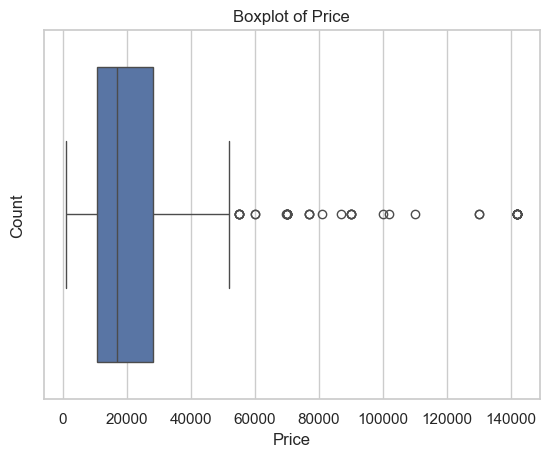

In [16]:
import seaborn as sns
sns.boxplot(x=mobile_df["Price"])
plt.ylabel("Count")
plt.title("Boxplot of Price")
plt.show()

In [138]:
# for outlier
q1 = df["Price"].quantile(0.25)
q3 = df["Price"].quantile(0.75)
IQR = q3 - q1

#lower and upper bounds
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR
dfclean = df[(df["Price"] >= lower) & (df["Price"] <= upper)]

#### After the outliers removed

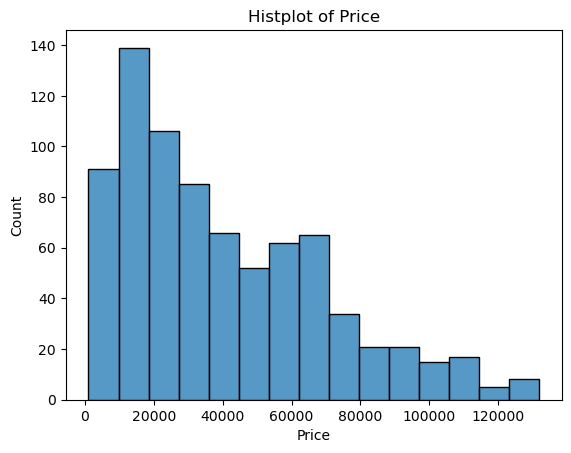

In [140]:
sns.histplot(data=dfclean,x="Price")
plt.title("Histplot of Price")
plt.show()

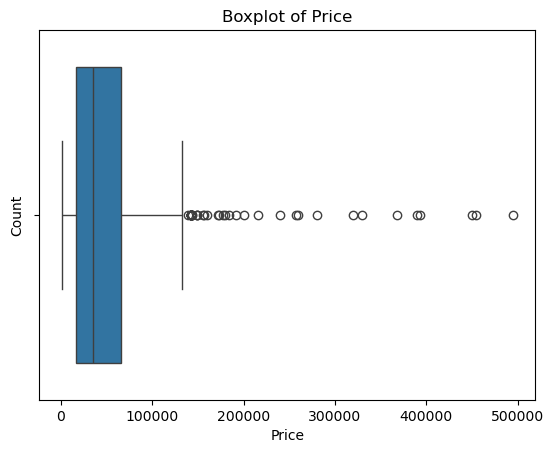

In [141]:
sns.boxplot(x=df["Price"])
plt.ylabel("Count")
plt.title("Boxplot of Price")
plt.show()

#### Insights for Price

-> Most products are between ₹20,000 and ₹40,000 — this is the usual price range.

-> Some are very expensive (above ₹70,000), probably top-end laptops or new flagship phones.

-> A few are really cheap (below ₹15,000), likely basic phones or Chromebooks.

#### Rating

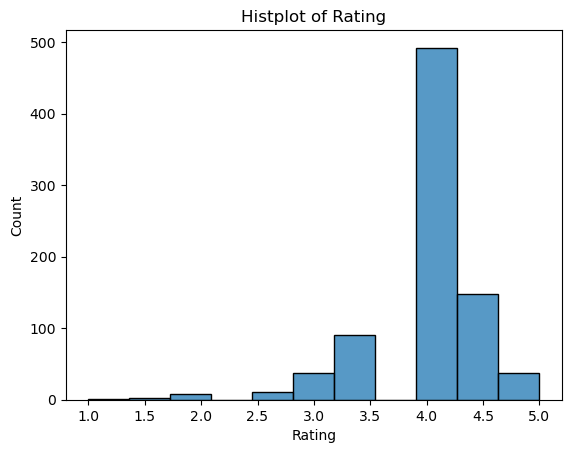

In [142]:
sns.histplot(x=df["Rating"])
plt.title("Histplot of Rating")
plt.show()

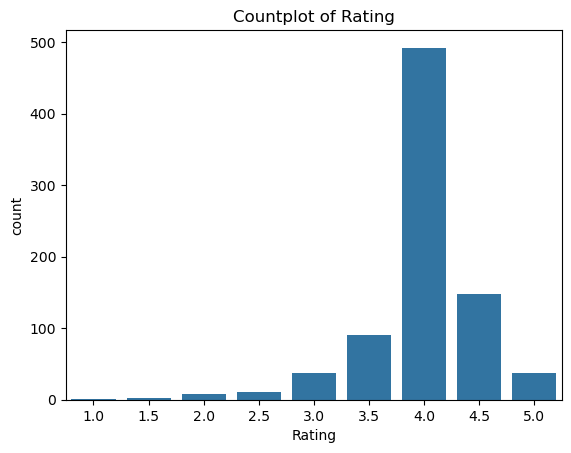

In [143]:
df["Rating"] = (df["Rating"] * 2).round() / 2
sns.countplot(data=df,x="Rating")
plt.title("Countplot of Rating")
plt.show()

#### insights for ratings

    -> Most products are rated around 4.0, showing that people are generally happy with their purchase.
    -> Very few products are poorly rated (below 3), and a small number have a perfect 5.0 rating.

#### Reviews

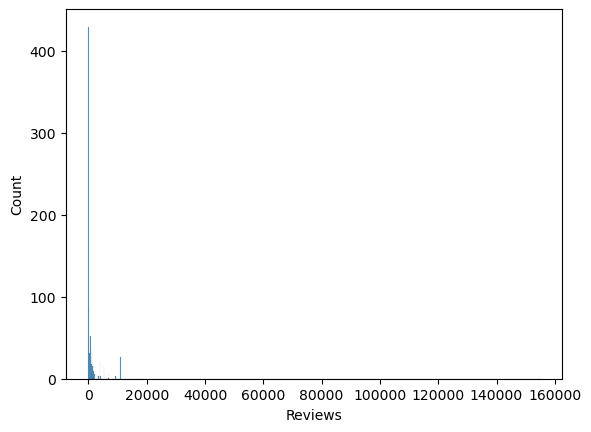

In [144]:
sns.histplot(data=df,x="Reviews")
plt.show()

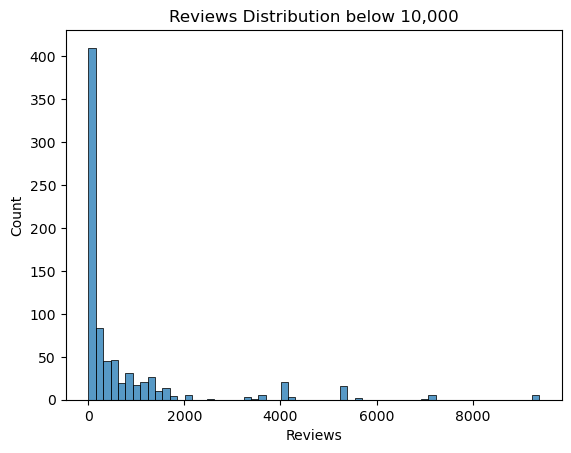

In [145]:
filter_df = df[df["Reviews"] < 10000]

sns.histplot(data=filter_df, x="Reviews")
plt.title("Reviews Distribution below 10,000")
plt.show()

#### Discount

In [ ]:
df

In [ ]:
sns.histplot(df["Discount"])
plt.title("Discount Distribution")
plt.show()

#### insights for Discount

#### Brand

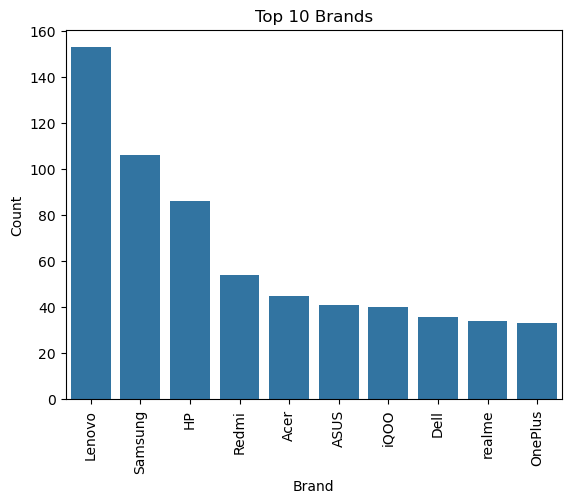

In [158]:
topbrands = df["Brand"].value_counts().head(10)
sns.barplot(x=topbrands.index, y=topbrands.values)
plt.title("Top 10 Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

#### insights for Brand

#### Category

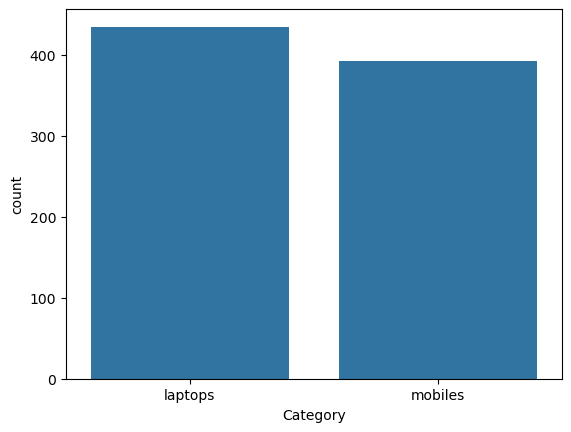

In [159]:
sns.countplot(data=df,x="Category")
plt.show()

#### insights for Category

#### RAM

In [160]:
# Seprate the data by category
dflaptops = df[df["Category"] == "laptops"]
dfmobiles = df[df["Category"] == "mobiles"]

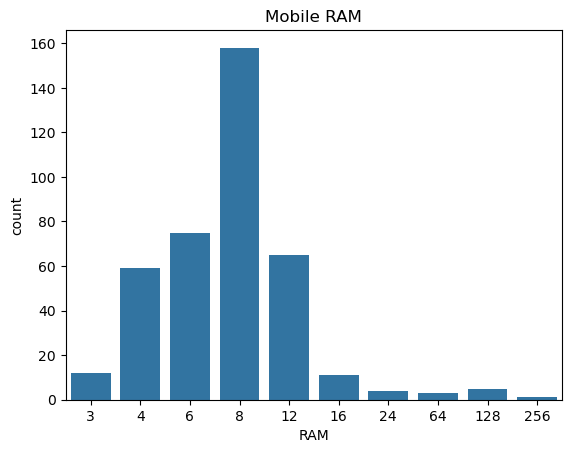

In [161]:
sns.countplot(x="RAM", data=dfmobiles)
plt.title("Mobile RAM")
plt.show()

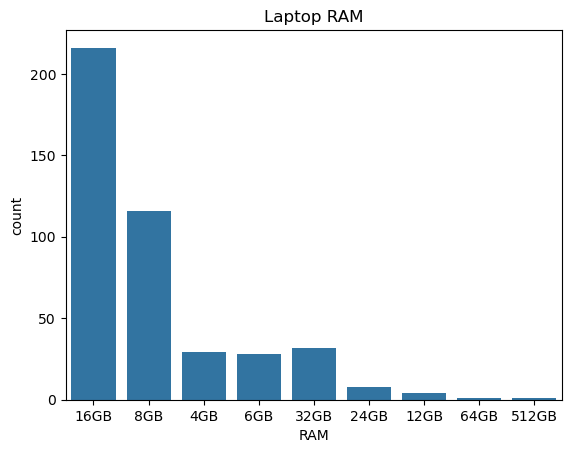

In [149]:
sns.countplot(x="RAM", data=dflaptops)
plt.title("Laptop RAM")
plt.show()

#### insights for RAM

    - Laptops usually come with 8GB to 16GB RAM, while mobiles mostly have 4GB to 8GB.
    
    - Higher RAM is found in premium models, and lower RAM is seen in budget devices.

#### Storage

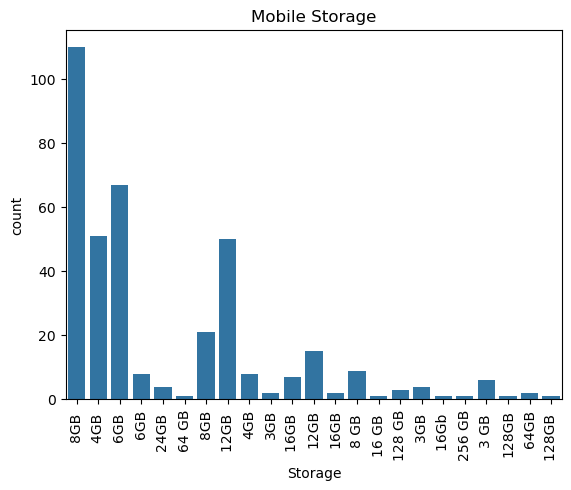

In [150]:
# Mobile Storage
sns.countplot(x="Storage", data=dfmobiles)
plt.title("Mobile Storage")
plt.xticks(rotation=90)
plt.show()


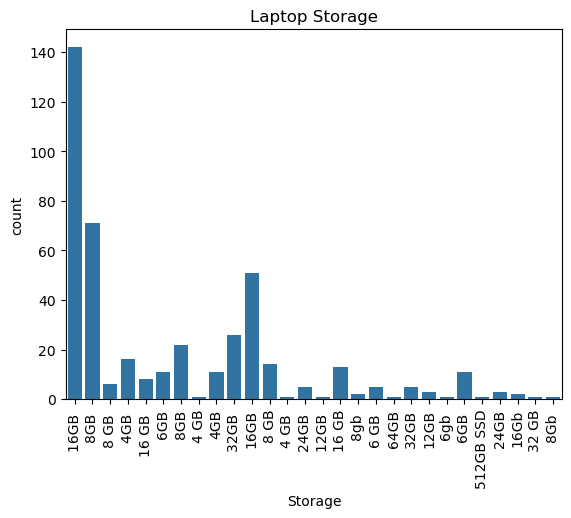

In [151]:
# Laptop Storage
sns.countplot(x="Storage", data=dflaptops)
plt.title("Laptop Storage")
plt.xticks(rotation=90)
plt.show()

#### insight for storage

# Bivariate Analysis

### Relationship between two variables

##### for Category and Price 

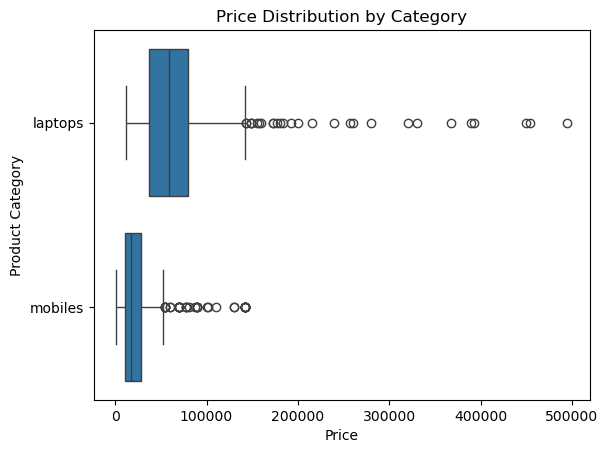

In [152]:
sns.boxplot(data=df, x='Price', y='Category')
plt.title('Price Distribution by Category')
plt.xlabel('Price')
plt.ylabel('Product Category')
plt.show()

### Category and Rating

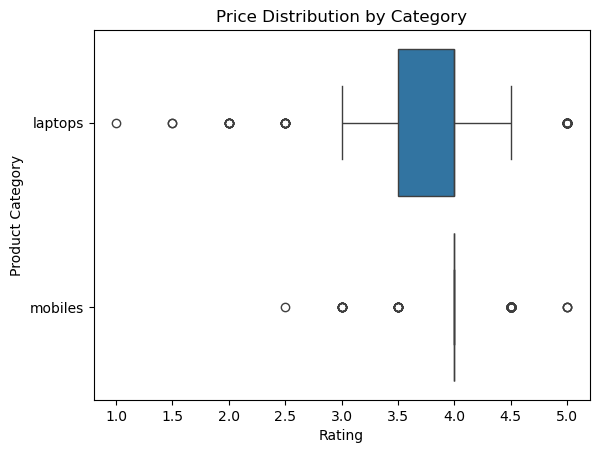

In [153]:
sns.boxplot(data=df, x='Rating', y='Category')
plt.title('Price Distribution by Category')
plt.xlabel('Rating')
plt.ylabel('Product Category')
plt.show()

#### insight for Price Distribution by Category

### Price and Rating

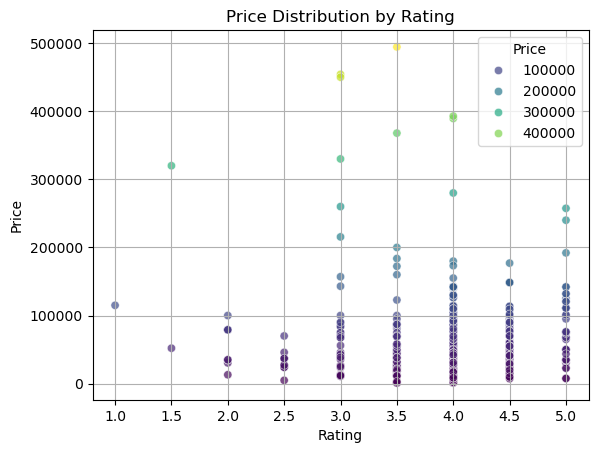

In [154]:
sns.scatterplot(data=df, x='Rating', y='Price',hue='Price', palette='viridis', alpha=0.7)
plt.title('Price Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.grid()
plt.show()

#### insight for price distribution by rating

### price and discount

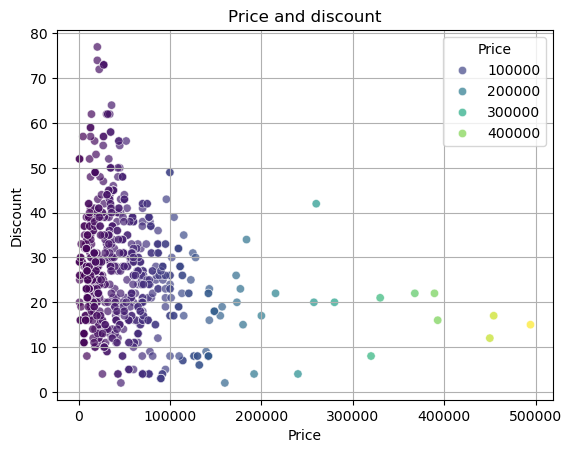

In [155]:
sns.scatterplot(data=df, x='Price', y='Discount', hue='Price', palette='viridis', alpha=0.7)
plt.title('Price and discount')
plt.xlabel('Price')
plt.ylabel('Discount')
plt.grid(True)
plt.show()

#### insight for price and discount

### Brand and Rating

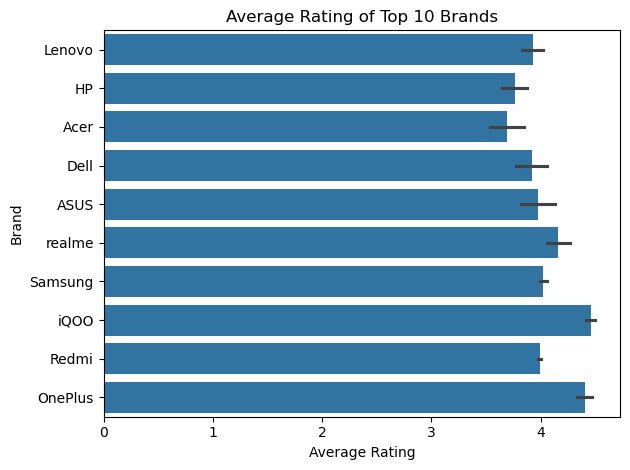

In [156]:
topbrands = df['Brand'].value_counts().head(10).index
# Filter original DataFrame for only those brands
topbrand_df = df[df['Brand'].isin(topbrands)]
sns.barplot(data=topbrand_df, x='Rating', y='Brand', estimator='mean')
plt.title('Average Rating of Top 10 Brands')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

#### insight for Average Rating of Top 10 Brands

### Reviews and Ratings

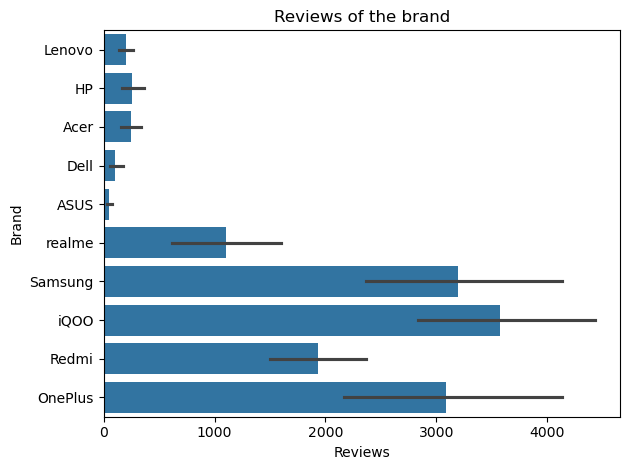

In [157]:
sns.barplot(data=topbrand_df, x='Reviews', y='Brand')
plt.title('Reviews of the brand')
plt.xlabel('Reviews')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

#### insight for the reviews of the brand

# Multivariate Analysis

### Relationship among 3 or more variables

#### Category, Price, Rating

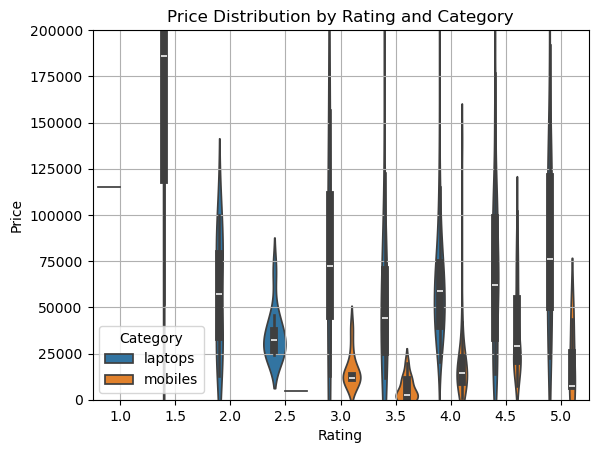

In [180]:
sns.violinplot(data=df, x="Rating", y="Price", hue="Category")
plt.title("Price Distribution by Rating and Category")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.ylim(0, 200000)
plt.grid(True)
plt.show()

##### insight for Category, Price, Rating

### Brand, Price, Discount

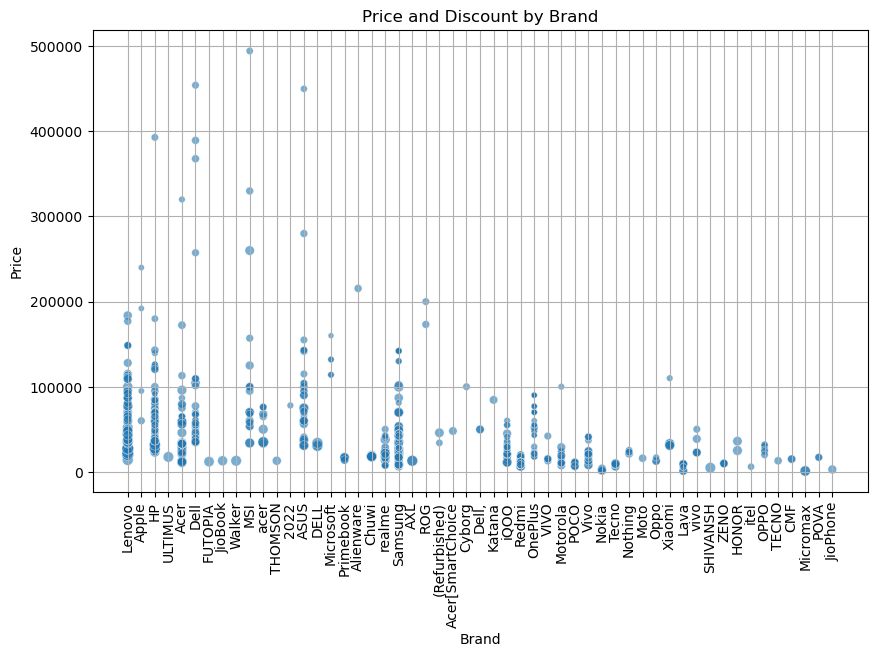

In [184]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Brand', y='Price', size='Discount', legend=False, alpha=0.6)
plt.title('Price and Discount by Brand')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

##### insight for Brand,Price,Discount

### Relationship Between Price, Storage, and Discount

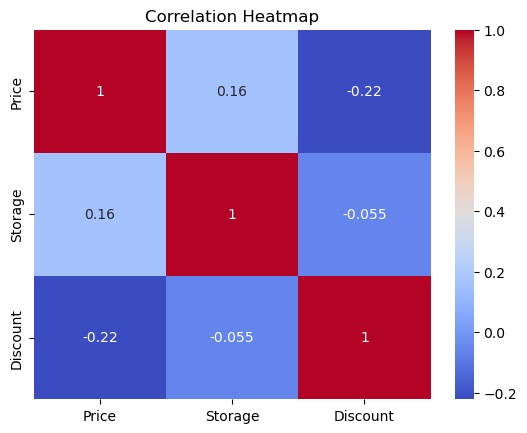

In [196]:
cols = ['Price','Storage','Discount']
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### insight for Price,Storage,Discount

### Comparison of Price, Rating, Reviews & Discount by Category

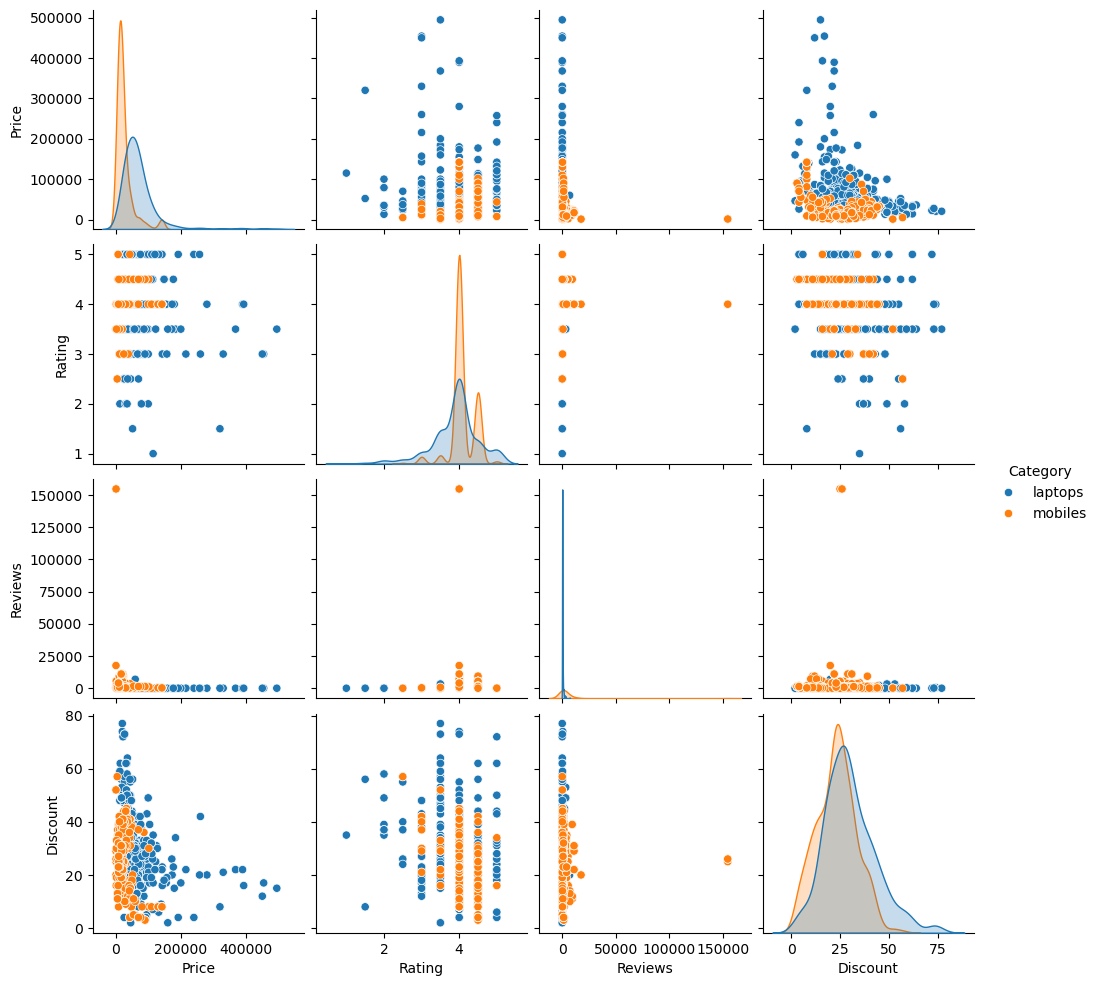

In [193]:
sns.pairplot(df[["Price", "Rating", "Reviews", "Discount", "Category"]], hue="Category")
plt.show()